From
# Deep Learning Nanodegree Foundation

This repository contains material related to Udacity's [Deep Learning Nanodegree Foundation](https://www.udacity.com/course/deep-learning-nanodegree-foundation--nd101) program. It consists of a bunch of tutorial notebooks for various deep learning topics. In most cases, the notebooks lead you through implementing models such as convolutional networks, recurrent networks, and GANs. There are other topics covered such as weight intialization and batch normalization.

Directory: embeddings
# Skip-gram word2vec

In this notebook, I'll lead you through using TensorFlow to implement the word2vec algorithm using the skip-gram architecture. By implementing this, you'll learn about embedding words for use in natural language processing. This will come in handy when dealing with things like machine translation.

In [1]:
import time

import numpy as np
import tensorflow as tf

import utils

Load the [text8 dataset](http://mattmahoney.net/dc/textdata.html), a file of cleaned up Wikipedia articles from Matt Mahoney. The next cell will download the data set to the `data` folder. Then you can extract it and delete the archive file to save storage space.

In [2]:
# dataset_folder_path = 'data'
# dataset_filename = 'text8.zip'
# dataset_name = 'Text8 Dataset'

import io
import hazm
filename = 'masnavi.txt'
file = io.open(filename, encoding='utf-8', errors='ignore')
text = file.read()
file.close()
# print(matn)

## Preprocessing

Here I'm fixing up the text to make training easier. This comes from the `utils` module I wrote. The `preprocess` function coverts any punctuation into tokens, so a period is changed to ` <PERIOD> `. In this data set, there aren't any periods, but it will help in other NLP problems. I'm also removing all words that show up five or fewer times in the dataset. This will greatly reduce issues due to noise in the data and improve the quality of the vector representations. If you want to write your own functions for this stuff, go for it.

In [3]:
# words = utils.preprocess(text)
words = hazm.word_tokenize(text)

In [4]:
print(words[:500])
type(words)

['\ufeffدفتر', 'اول', 'مثنوی', 'بشنو', 'از', 'نى', 'چون', 'حكايت', 'مى\u200fكند', 'از', 'جدايى\u200fها', 'شكايت', 'مى\u200fكند', 'كز', 'نيستان', 'تا', 'مرا', 'ببريده\u200fاند', 'در', 'نفيرم', 'مرد', 'و', 'زن', 'ناليده\u200fاند', 'سينه', 'خواهم_شرحه', 'شرحه', 'از', 'فراق', 'تا', 'بگويم', 'شرح', 'درد', 'اشتياق\u200f', 'هر', 'كسى', 'كاو', 'دور', 'ماند', 'از', 'اصل', 'خويش', 'باز', 'جويد', 'روزگار', 'وصل', 'خويش\u200f', 'من', 'به', 'هر', 'جمعيتى', 'نالان', 'شدم', 'جفت', 'بد', 'حالان', 'و', 'خوش', 'حالان', 'شدم\u200f', 'هر', 'كسى', 'از', 'ظن', 'خود', 'شد', 'يار', 'من', 'از', 'درون', 'من', 'نجست', 'اسرار', 'من\u200f', 'سر', 'من', 'از', 'ناله\u200fى', 'من', 'دور', 'نيست', 'ليك', 'چشم', 'و', 'گوش', 'را', 'آن', 'نور', 'نيست\u200f', 'تن', 'ز', 'جان', 'و', 'جان', 'ز', 'تن', 'مستور', 'نيست', 'ليك', 'كس', 'را', 'ديد', 'جان', 'دستور', 'نيست\u200f', 'آتش', 'است', 'اين', 'بانگ', 'ناى', 'و', 'نيست', 'باد', 'هر', 'كه', 'اين', 'آتش', 'ندارد', 'نيست', 'باد', 'آتش', 'عشق', 'است', 'كاندر', 'نى', 'فتاد', 'جو

list

In [5]:
print("Total words: {}".format(len(words)))
print("Unique words: {}".format(len(set(words))))

Total words: 346997
Unique words: 28718


And here I'm creating dictionaries to convert words to integers and backwards, integers to words. The integers are assigned in descending frequency order, so the most frequent word ("the") is given the integer 0 and the next most frequent is 1 and so on. The words are converted to integers and stored in the list `int_words`.

In [6]:
vocab_to_int, int_to_vocab = utils.create_lookup_tables(words)
int_words = [vocab_to_int[word] for word in words]

## Subsampling

Words that show up often such as "the", "of", and "for" don't provide much context to the nearby words. If we discard some of them, we can remove some of the noise from our data and in return get faster training and better representations. This process is called subsampling by Mikolov. For each word $w_i$ in the training set, we'll discard it with probability given by 

$$ P(w_i) = 1 - \sqrt{\frac{t}{f(w_i)}} $$

where $t$ is a threshold parameter and $f(w_i)$ is the frequency of word $w_i$ in the total dataset.

I'm going to leave this up to you as an exercise. This is more of a programming challenge, than about deep learning specifically. But, being able to prepare your data for your network is an important skill to have. Check out my solution to see how I did it.

> **Exercise:** Implement subsampling for the words in `int_words`. That is, go through `int_words` and discard each word given the probablility $P(w_i)$ shown above. Note that $P(w_i)$ is the probability that a word is discarded. Assign the subsampled data to `train_words`.

In [7]:
print(int_words[:5]) 
print(len(int_words))

[14102, 260, 14103, 655, 2]
346997


In [8]:
## Your code here
import random
from collections import Counter
t = 1e-5
train_words = [] 
lookup = Counter(int_words) 
freq = {word: (lookup[word]/len(int_words)) for word in int_words}
sorted_freq = sorted(freq.values()) 
print(max(sorted_freq)) 
print(min(sorted_freq)) 

p_drop = {word: 1 - np.sqrt(t/freq[word]) for word in int_words}
sorted_p_drop = sorted(p_drop.values()) 
print(max(sorted_p_drop)) 
print(min(sorted_p_drop))  
for word in int_words: 
    p_w = 1 - np.sqrt(t/freq[word]) 
    if (1- p_w) > random.random(): #If p is 0.7, there is a 70% chance of random number < 0.7
        train_words.append(word) 

0.04110121989527287
2.881869295699963e-06
0.9844018661066015
-0.8627855485804048


In [9]:
print(train_words[:5])
print(len(train_words))

[14102, 14103, 14104, 6562, 14105]
91019


## Making batches

Now that our data is in good shape, we need to get it into the proper form to pass it into our network. With the skip-gram architecture, for each word in the text, we want to grab all the words in a window around that word, with size $C$. 

From [Mikolov et al.](https://arxiv.org/pdf/1301.3781.pdf): 

"Since the more distant words are usually less related to the current word than those close to it, we give less weight to the distant words by sampling less from those words in our training examples... If we choose $C = 5$, for each training word we will select randomly a number $R$ in range $< 1; C >$, and then use $R$ words from history and $R$ words from the future of the current word as correct labels."

> **Exercise:** Implement a function `get_target` that receives a list of words, an index, and a window size, then returns a list of words in the window around the index. Make sure to use the algorithm described above, where you choose a random number of words from the window.

In [10]:
def get_target(words, idx, window_size=5):
    ''' Get a list of words in a window around an index. '''
    
    R = np.random.randint(1, window_size+1)
    start = idx - R if (idx - R) > 0 else 0
    stop = idx + R
    target_words = set(words[start:idx] + words[idx+1:stop+1])
    
    return list(target_words)

print(get_target([11,123,41,444,111,1123,441,11,11141234432,3443,13],7))

[11141234432, 1123, 13, 111, 3443, 441]


Here's a function that returns batches for our network. The idea is that it grabs `batch_size` words from a words list. Then for each of those words, it gets the target words in the window. I haven't found a way to pass in a random number of target words and get it to work with the architecture, so I make one row per input-target pair. This is a generator function by the way, helps save memory.

In [11]:
def get_batches(words, batch_size, window_size=5):
    ''' Create a generator of word batches as a tuple (inputs, targets) '''
    
    n_batches = len(words)//batch_size
    
    # only full batches
    words = words[:n_batches*batch_size]
    
    for idx in range(0, len(words), batch_size):
        x, y = [], []
        batch = words[idx:idx+batch_size]
        for ii in range(len(batch)):
            batch_x = batch[ii]
            batch_y = get_target(batch, ii, window_size)
            y.extend(batch_y)
            x.extend([batch_x]*len(batch_y))
        yield x, y
    

## Building the graph

From [Chris McCormick's blog](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/), we can see the general structure of our network.
![embedding_network](./assets/skip_gram_net_arch.png)

The input words are passed in as integers. This will go into a hidden layer of linear units, then into a softmax layer. We'll use the softmax layer to make a prediction like normal.

The idea here is to train the hidden layer weight matrix to find efficient representations for our words. We can discard the softmax layer becuase we don't really care about making predictions with this network. We just want the embedding matrix so we can use it in other networks we build from the dataset.

I'm going to have you build the graph in stages now. First off, creating the `inputs` and `labels` placeholders like normal.

> **Exercise:** Assign `inputs` and `labels` using `tf.placeholder`. We're going to be passing in integers, so set the data types to `tf.int32`. The batches we're passing in will have varying sizes, so set the batch sizes to [`None`]. To make things work later, you'll need to set the second dimension of `labels` to `None` or `1`.

In [12]:
train_graph = tf.Graph()
with train_graph.as_default():
    inputs = tf.placeholder(tf.int32,[None])
    labels = tf.placeholder(tf.int32,[None, None])

In [13]:
print(inputs[:5])

Tensor("strided_slice:0", shape=(?,), dtype=int32)


## Embedding



The embedding matrix has a size of the number of words by the number of units in the hidden layer. So, if you have 10,000 words and 300 hidden units, the matrix will have size $10,000 \times 300$. Remember that we're using tokenized data for our inputs, usually as integers, where the number of tokens is the number of words in our vocabulary.


> **Exercise:** Tensorflow provides a convenient function [`tf.nn.embedding_lookup`](https://www.tensorflow.org/api_docs/python/tf/nn/embedding_lookup) that does this lookup for us. You pass in the embedding matrix and a tensor of integers, then it returns rows in the matrix corresponding to those integers. Below, set the number of embedding features you'll use (200 is a good start), create the embedding matrix variable, and use `tf.nn.embedding_lookup` to get the embedding tensors. For the embedding matrix, I suggest you initialize it with a uniform random numbers between -1 and 1 using [tf.random_uniform](https://www.tensorflow.org/api_docs/python/tf/random_uniform).

In [14]:
n_vocab = len(int_to_vocab)
n_embedding =  50
with train_graph.as_default():
    embedding = tf.Variable(tf.random_uniform((n_vocab, n_embedding), -1, 1))
    embed = tf.nn.embedding_lookup(embedding, inputs)

In [15]:
n_vocab

28718

## Negative sampling



For every example we give the network, we train it using the output from the softmax layer. That means for each input, we're making very small changes to millions of weights even though we only have one true example. This makes training the network very inefficient. We can approximate the loss from the softmax layer by only updating a small subset of all the weights at once. We'll update the weights for the correct label, but only a small number of incorrect labels. This is called ["negative sampling"](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf). Tensorflow has a convenient function to do this, [`tf.nn.sampled_softmax_loss`](https://www.tensorflow.org/api_docs/python/tf/nn/sampled_softmax_loss).

> **Exercise:** Below, create weights and biases for the softmax layer. Then, use [`tf.nn.sampled_softmax_loss`](https://www.tensorflow.org/api_docs/python/tf/nn/sampled_softmax_loss) to calculate the loss. Be sure to read the documentation to figure out how it works.

In [16]:
# Number of negative labels to sample
n_sampled = 100
with train_graph.as_default():
    softmax_w = tf.Variable(tf.truncated_normal((n_vocab, n_embedding), stddev=0.1))
    softmax_b = tf.Variable(tf.zeros(n_vocab))
    
    # Calculate the loss using negative sampling
    loss = tf.nn.sampled_softmax_loss(softmax_w, softmax_b, 
                                      labels, embed,
                                      n_sampled, n_vocab)
    
    cost = tf.reduce_mean(loss)
    optimizer = tf.train.AdamOptimizer().minimize(cost)

## Validation

This code is from Thushan Ganegedara's implementation. Here we're going to choose a few common words and few uncommon words. Then, we'll print out the closest words to them. It's a nice way to check that our embedding table is grouping together words with similar semantic meanings.

In [17]:
with train_graph.as_default():
    ## From Thushan Ganegedara's implementation
    valid_size = 8 # Random set of words to evaluate similarity on.
    valid_window = 50
    # pick 8 samples from (0,100) and (1000,1100) each ranges. lower id implies more frequent 
    valid_examples = np.array(random.sample(range(valid_window), valid_size//2))
    valid_examples = np.append(valid_examples, 
                               random.sample(range(500,500+valid_window), valid_size//2))

    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
    
    # We use the cosine distance:
    norm = tf.sqrt(tf.reduce_sum(tf.square(embedding), 1, keep_dims=True))
    normalized_embedding = embedding / norm
    valid_embedding = tf.nn.embedding_lookup(normalized_embedding, valid_dataset)
    similarity = tf.matmul(valid_embedding, tf.transpose(normalized_embedding))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
# If the checkpoints directory doesn't exist:
!mkdir checkpoints_fa

A subdirectory or file checkpoints_fa already exists.


## Training

Below is the code to train the network. Every 100 batches it reports the training loss. Every 1000 batches, it'll print out the validation words.

In [36]:
epochs = 50
batch_size = 1000
window_size = 10

with train_graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=train_graph) as sess:
    iteration = 1
    loss = 0
    sess.run(tf.global_variables_initializer())

    for e in range(1, epochs+1):
        print("Epoch {}/{}".format(e, epochs))
        batches = get_batches(train_words, batch_size, window_size)
        start = time.time()
        for x, y in batches:
            
            feed = {inputs: x,
                    labels: np.array(y)[:, None]}
            train_loss, _ = sess.run([cost, optimizer], feed_dict=feed)
            
            loss += train_loss
            
            if iteration % 10 == 0: 
                end = time.time()
                print("Epoch {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Avg. Training loss: {:.4f}".format(loss/100),
                      "{:.4f} sec/batch".format((end-start)/100))
                loss = 0
                start = time.time()
            
            if iteration % 100 == 0:
                ## From Thushan Ganegedara's implementation
                # note that this is expensive (~20% slowdown if computed every 500 steps)
                sim = similarity.eval()
                for i in range(valid_size):
                    valid_word = int_to_vocab[valid_examples[i]]
                    top_k = 8 # number of nearest neighbors
                    nearest = (-sim[i, :]).argsort()[1:top_k+1]
                    log = 'Nearest to %s:' % valid_word
                    for k in range(top_k):
                        close_word = int_to_vocab[nearest[k]]
                        log = '%s %s,' % (log, close_word)
                    print(log)
            
            iteration += 1
    save_path = saver.save(sess, "checkpoints_fa/divan.ckpt")
    embed_mat = sess.run(normalized_embedding)

Epoch 1/50
Epoch 1/50 Iteration: 10 Avg. Training loss: 0.5056 0.0038 sec/batch
Epoch 1/50 Iteration: 20 Avg. Training loss: 0.5045 0.0022 sec/batch
Epoch 1/50 Iteration: 30 Avg. Training loss: 0.4997 0.0022 sec/batch
Epoch 1/50 Iteration: 40 Avg. Training loss: 0.4897 0.0019 sec/batch
Epoch 1/50 Iteration: 50 Avg. Training loss: 0.4846 0.0019 sec/batch
Epoch 1/50 Iteration: 60 Avg. Training loss: 0.4900 0.0018 sec/batch
Epoch 1/50 Iteration: 70 Avg. Training loss: 0.4810 0.0020 sec/batch
Epoch 1/50 Iteration: 80 Avg. Training loss: 0.4774 0.0023 sec/batch
Epoch 1/50 Iteration: 90 Avg. Training loss: 0.4922 0.0023 sec/batch
Epoch 2/50
Epoch 2/50 Iteration: 100 Avg. Training loss: 0.5091 0.0017 sec/batch
Nearest to اين: عمش‏, خيال‏, غلو, بخفت‏, أكرمته, استأنس, مشفقى, ملكها,
Nearest to جان: مكتنس, شناسانند, خواهنده, زندان, تازگى, حيرانم, وليتم, مجنون‏اند,
Nearest to ز: اقتراب, بگردان, انبارش, خيال‏, پگه, خفاش, سيعود, احتمال‏,
Nearest to نيست: حَرَجٌ, همى‏كرد, آموخته_بود, ارضعى‏, مى‏خسبم,

Epoch 8/50
Epoch 8/50 Iteration: 640 Avg. Training loss: 0.4740 0.0006 sec/batch
Epoch 8/50 Iteration: 650 Avg. Training loss: 0.4769 0.0018 sec/batch
Epoch 8/50 Iteration: 660 Avg. Training loss: 0.4814 0.0019 sec/batch
Epoch 8/50 Iteration: 670 Avg. Training loss: 0.4725 0.0019 sec/batch
Epoch 8/50 Iteration: 680 Avg. Training loss: 0.4700 0.0018 sec/batch
Epoch 8/50 Iteration: 690 Avg. Training loss: 0.4764 0.0020 sec/batch
Epoch 8/50 Iteration: 700 Avg. Training loss: 0.4557 0.0021 sec/batch
Nearest to اين: عمش‏, خيال‏, غلو, أكرمته, مشفقى, بخفت‏, استأنس, ملكها,
Nearest to جان: مكتنس, خواهنده, تازگى, شناسانند, حيرانم, زندان, زمايم, مجنون‏اند,
Nearest to ز: اقتراب, بگردان, انبارش, احتمال‏, خيال‏, پگه, سرخى, مطر,
Nearest to نيست: حَرَجٌ, همى‏كرد, ارضعى‏, آموخته_بود, مى‏خسبم, نيستها, غالب‏اند, آوردش,
Nearest to سيه: خيره‏, حطيم, خاكى, اوفتادن, بستانش, تافتى‏, ايجاد, فاتحه,
Nearest to فضل: پيغامبر, ببخشد, دلبريى, شوره, كافرى, سفلى‏, ساخته_است, نوحه‏گر,
Nearest to حسن: زيركانشان, مى‏ستان

Epoch 14/50 Iteration: 1270 Avg. Training loss: 0.4307 0.0024 sec/batch
Epoch 15/50
Epoch 15/50 Iteration: 1280 Avg. Training loss: 0.4568 0.0010 sec/batch
Epoch 15/50 Iteration: 1290 Avg. Training loss: 0.4620 0.0018 sec/batch
Epoch 15/50 Iteration: 1300 Avg. Training loss: 0.4602 0.0019 sec/batch
Nearest to اين: خيال‏, عمش‏, بخفت‏, مشفقى, غلو, أكرمته, قبح‏, استأنس,
Nearest to جان: مكتنس, دق, زمايم, خواهنده, تازگى, فصد, خصمى, ببيند,
Nearest to ز: اقتراب, انبارش, بگردان, هستى, خيال‏, احتمال‏, مطر, سرخى,
Nearest to نيست: ارضعى‏, همى‏كرد, حَرَجٌ, نيستها, آوردش, خلطى, مى‏خسبم, آموخته_بود,
Nearest to سيه: خاكى, حطيم, خيره‏, غرقيم, ايجاد, اوفتادن, سبحه‏ى, موزه‏كرد,
Nearest to فضل: پيغامبر, شوره, دلبريى, ببخشد, سفلى‏, مبشر, التباس‏, ملامت,
Nearest to حسن: جوال, زيركانشان, نازنين, مى‏ستانم, رغبتى, شاخى, بلاست, قديم,
Nearest to ببينى: بى‏حرف, مكدر, استثنا, قهربار, بپذير, شهره‏ى, ناكردنى‏, طبلى,
Epoch 15/50 Iteration: 1310 Avg. Training loss: 0.4529 0.0021 sec/batch
Epoch 15/50 Iteration: 1320 

Epoch 22/50
Epoch 22/50 Iteration: 1920 Avg. Training loss: 0.4421 0.0017 sec/batch
Epoch 22/50 Iteration: 1930 Avg. Training loss: 0.4337 0.0019 sec/batch
Epoch 22/50 Iteration: 1940 Avg. Training loss: 0.4217 0.0018 sec/batch
Epoch 22/50 Iteration: 1950 Avg. Training loss: 0.4193 0.0018 sec/batch
Epoch 22/50 Iteration: 1960 Avg. Training loss: 0.4181 0.0018 sec/batch
Epoch 22/50 Iteration: 1970 Avg. Training loss: 0.4180 0.0018 sec/batch
Epoch 22/50 Iteration: 1980 Avg. Training loss: 0.4184 0.0018 sec/batch
Epoch 22/50 Iteration: 1990 Avg. Training loss: 0.4056 0.0019 sec/batch
Epoch 22/50 Iteration: 2000 Avg. Training loss: 0.4014 0.0018 sec/batch
Nearest to اين: خيال‏, مشفقى, غلو, بخفت‏, يكى, سركشى, استأنس, ميانه,
Nearest to جان: مكتنس, فصد, دق, گشى, زمايم, خصمى, سايه‏ست, خواهنده,
Nearest to ز: اقتراب, انبارش, هستى, پگه, بگردان, خيال‏, نعمتها, احتمال‏,
Nearest to نيست: ارضعى‏, همى‏كرد, نيستها, قطره, آوردش, حبوب, حَرَجٌ, ضيايى,
Nearest to سيه: غرقيم, خاكى, حطيم, تكون, ايجاد, سبحه‏ى

Epoch 29/50 Iteration: 2550 Avg. Training loss: 0.3956 0.0004 sec/batch
Epoch 29/50 Iteration: 2560 Avg. Training loss: 0.4090 0.0018 sec/batch
Epoch 29/50 Iteration: 2570 Avg. Training loss: 0.4083 0.0018 sec/batch
Epoch 29/50 Iteration: 2580 Avg. Training loss: 0.3984 0.0018 sec/batch
Epoch 29/50 Iteration: 2590 Avg. Training loss: 0.4045 0.0018 sec/batch
Epoch 29/50 Iteration: 2600 Avg. Training loss: 0.3846 0.0022 sec/batch
Nearest to اين: خيال‏, مشفقى, غلو, سركشى, يكى, ميانه, استأنس, نمى‏يابيد,
Nearest to جان: مكتنس, سايه‏ست, گشى, دق, خواهنده, آورده_باشد, زمايم, فصد,
Nearest to ز: انبارش, اقتراب, پگه, هستى, نعمتها, بگردان, اسگاليده, خيال‏,
Nearest to نيست: ارضعى‏, همى‏كرد, نيستها, قطره, ضيايى, سراج‏, نيكوهاى, كيرت,
Nearest to سيه: غرقيم, خاكى, تكون, گدازان, سبحه‏ى, حطيم, موزه‏كرد, ميوه‏ستش,
Nearest to فضل: مبشر, التباس‏, پيغامبر, ملامت, العلا, برو, سفلى‏, دلبريى,
Nearest to حسن: جوال, بلاست, نازنين, مى‏ستانم, چراغت, رغبتى, طلسم, عاشق‏تر,
Nearest to ببينى: مكدر, استثنا, ناكردنى‏, ب

Epoch 35/50 Iteration: 3170 Avg. Training loss: 0.3730 0.0018 sec/batch
Epoch 35/50 Iteration: 3180 Avg. Training loss: 0.3643 0.0018 sec/batch
Epoch 36/50
Epoch 36/50 Iteration: 3190 Avg. Training loss: 0.3840 0.0009 sec/batch
Epoch 36/50 Iteration: 3200 Avg. Training loss: 0.3833 0.0018 sec/batch
Nearest to اين: خيال‏, مشفقى, استأنس, سركشى, نمى‏يابيد, غلو, كامسالمان, مددشان,
Nearest to جان: مكتنس, سايه‏ست, آورده_باشد, گشى, خواهنده, دق, كاهليش‏, زمايم,
Nearest to ز: انبارش, اقتراب, پگه, نعمتها, هستى, بگردان, اسگاليده, كافران,
Nearest to نيست: نيستها, ارضعى‏, خشك‏تر, ضيايى, همى‏كرد, ايام, سراج‏, قطره,
Nearest to سيه: غرقيم, گدازان, تكون, خاكى, سبحه‏ى, حطيم, اوفتادن, ميوه‏ستش,
Nearest to فضل: مبشر, التباس‏, ملامت, پيغامبر, العلا, برو, سفلى‏, تمنوا,
Nearest to حسن: بلاست, جوال, نازنين, طلسم, چراغت, عاشق‏تر, يشم‏, مى‏ستانم,
Nearest to ببينى: مكدر, استثنا, بى‏حرف, ناكردنى‏, انشار, الوصال, پيشه‏اى‏, بى‏كبد,
Epoch 36/50 Iteration: 3210 Avg. Training loss: 0.3876 0.0020 sec/batch
Epoch 36/50 

Epoch 42/50 Iteration: 3800 Avg. Training loss: 0.3558 0.0019 sec/batch
Nearest to اين: استأنس, نمى‏يابيد, مشفقى, سازم, خراج, خيال‏, ديوشان, كامسالمان,
Nearest to جان: مكتنس, سايه‏ست, آورده_باشد, خواهنده, كاهليش‏, رمال, گشى, دق,
Nearest to ز: انبارش, اقتراب, پگه, نعمتها, هستى, بگردان, اسگاليده, كافران,
Nearest to نيست: خشك‏تر, نيستها, ايام, سراج‏, ارضعى‏, بى‏زر, قطره, غشيان,
Nearest to سيه: غرقيم, گدازان, تكون, سبحه‏ى, خاكى, حطيم, اوفتادن, زخمم,
Nearest to فضل: مبشر, التباس‏, ملامت, تمنوا, سفلى‏, العلا, متحد, بى‏مخلص,
Nearest to حسن: طلسم, بلاست, عاشق‏تر, يشم‏, نازنين, ترياق‏زار, چراغت, پرده‏ام‏,
Nearest to ببينى: مكدر, استثنا, الوصال, پيشه‏اى‏, ناكردنى‏, انشار, بى‏حرف, بى‏كبد,
Epoch 42/50 Iteration: 3810 Avg. Training loss: 0.3505 0.0028 sec/batch
Epoch 42/50 Iteration: 3820 Avg. Training loss: 0.3474 0.0018 sec/batch
Epoch 43/50
Epoch 43/50 Iteration: 3830 Avg. Training loss: 0.3742 0.0014 sec/batch
Epoch 43/50 Iteration: 3840 Avg. Training loss: 0.3723 0.0018 sec/batch
Epoch 43/50 I

Epoch 49/50 Iteration: 4410 Avg. Training loss: 0.3357 0.0020 sec/batch
Epoch 49/50 Iteration: 4420 Avg. Training loss: 0.3510 0.0018 sec/batch
Epoch 49/50 Iteration: 4430 Avg. Training loss: 0.3362 0.0018 sec/batch
Epoch 49/50 Iteration: 4440 Avg. Training loss: 0.3434 0.0019 sec/batch
Epoch 49/50 Iteration: 4450 Avg. Training loss: 0.3406 0.0018 sec/batch
Epoch 50/50
Epoch 50/50 Iteration: 4460 Avg. Training loss: 0.3342 0.0002 sec/batch
Epoch 50/50 Iteration: 4470 Avg. Training loss: 0.3616 0.0018 sec/batch
Epoch 50/50 Iteration: 4480 Avg. Training loss: 0.3566 0.0018 sec/batch
Epoch 50/50 Iteration: 4490 Avg. Training loss: 0.3571 0.0018 sec/batch
Epoch 50/50 Iteration: 4500 Avg. Training loss: 0.3378 0.0019 sec/batch
Nearest to اين: بك, سازم, نمى‏يابيد, سعودش, خراج, دمدمه‏, شومت, نالم,
Nearest to جان: مكتنس, سايه‏ست, آورده_باشد, نخورده, رمال, مومين, خواهنده, تصاريف,
Nearest to ز: انبارش, اقتراب, پگه, نعمتها, هستى, كافران, اسگاليده, محبوسش,
Nearest to نيست: خشك‏تر, ايام, نيستها, سر

Restore the trained network if you need to:

In [37]:
with train_graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=train_graph) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints_fa'))
    embed_mat = sess.run(embedding)

INFO:tensorflow:Restoring parameters from checkpoints_fa\divan.ckpt


In [34]:
embed_mat.shape

(28718, 50)

## Visualizing the word vectors

Below we'll use T-SNE to visualize how our high-dimensional word vectors cluster together. T-SNE is used to project these vectors into two dimensions while preserving local stucture. Check out [this post from Christopher Olah](http://colah.github.io/posts/2014-10-Visualizing-MNIST/) to learn more about T-SNE and other ways to visualize high-dimensional data.

In [24]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [29]:
viz_words = 150
tsne = TSNE()
embed_tsne = tsne.fit_transform(embed_mat[:viz_words, :])

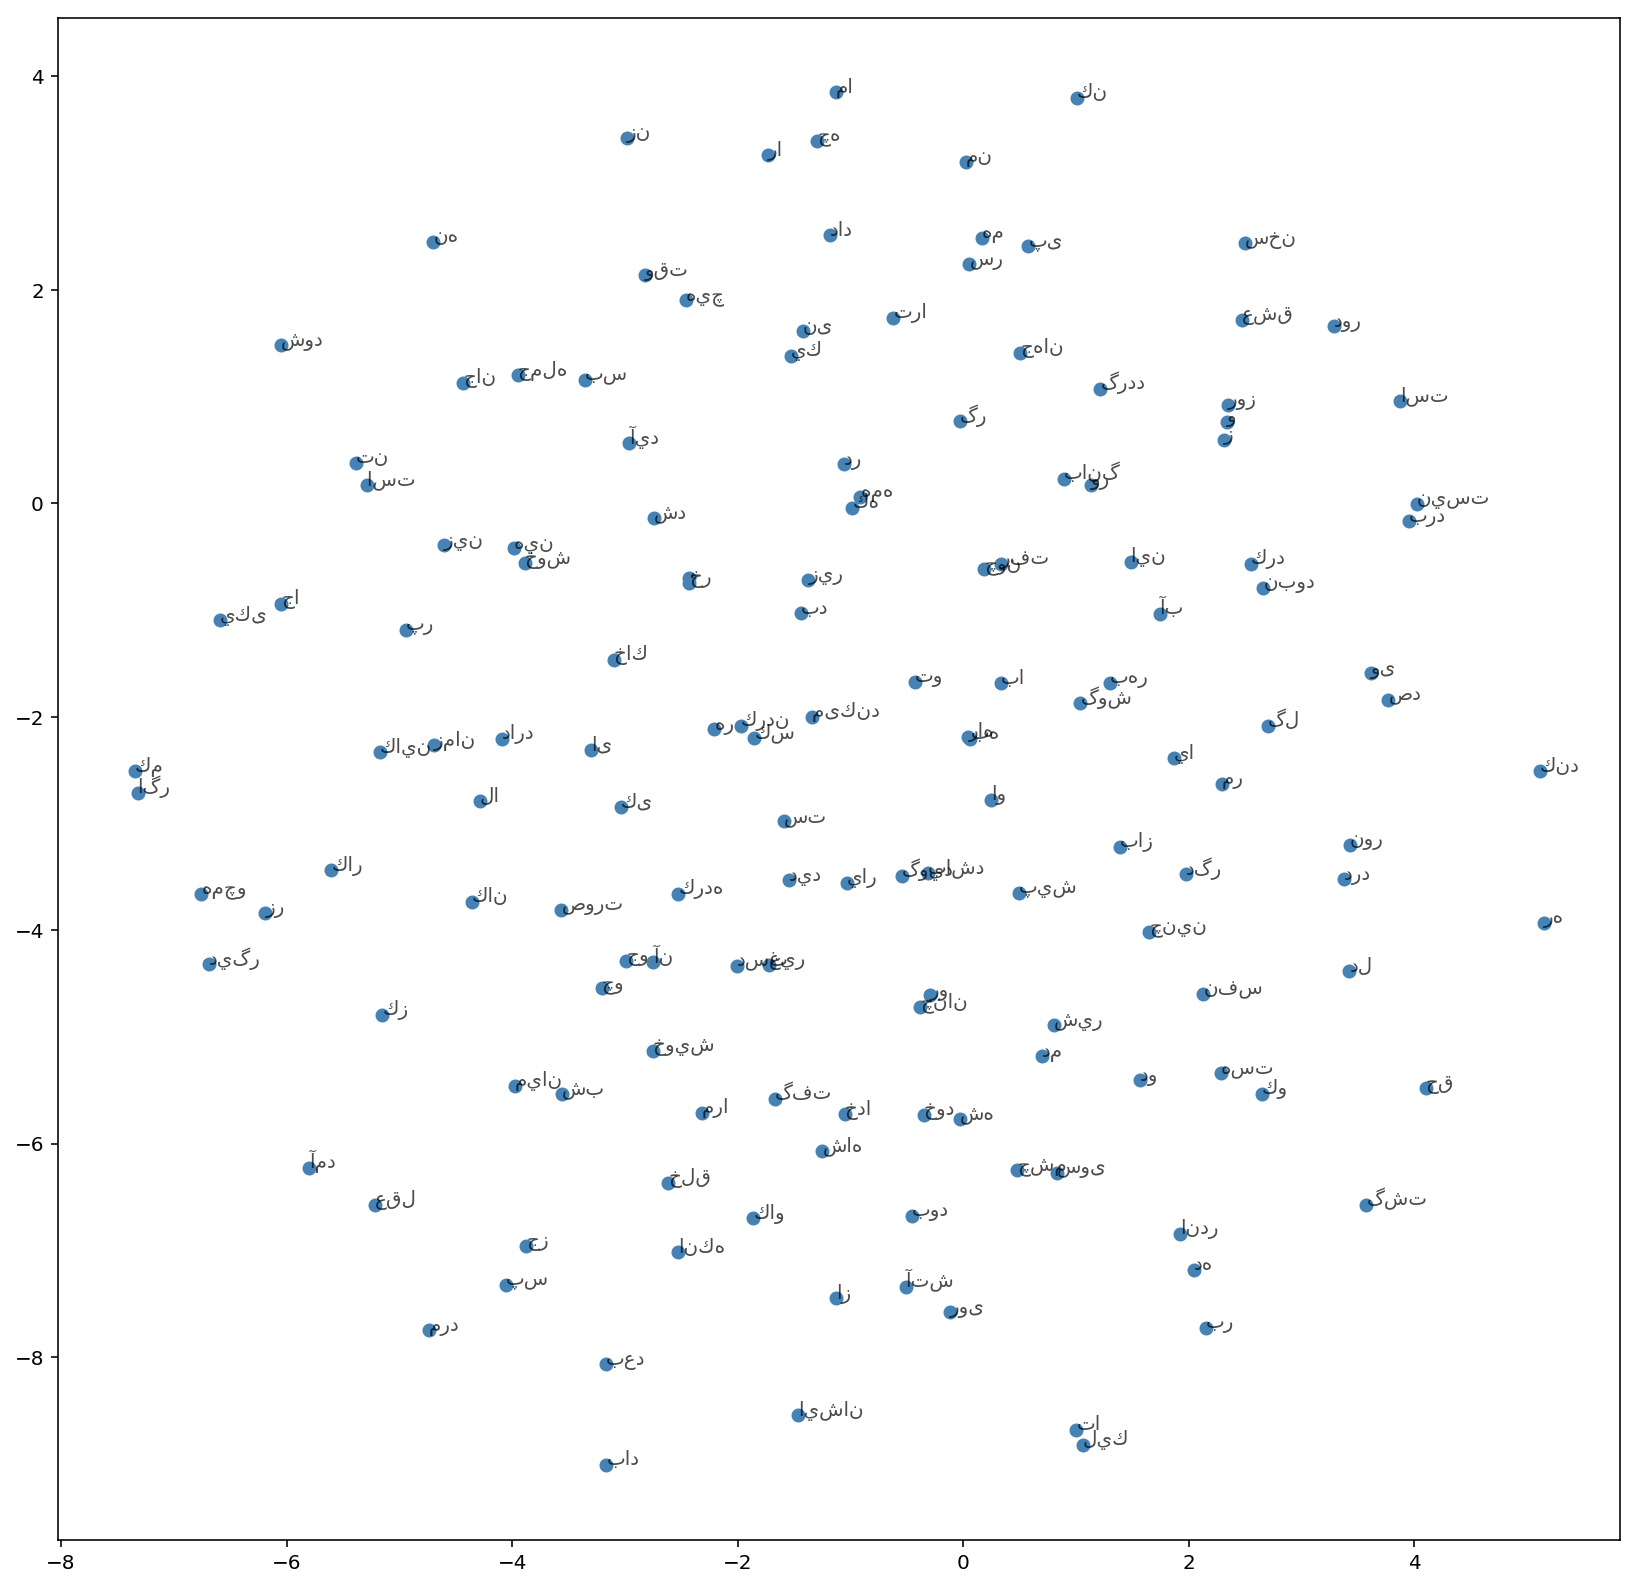

In [30]:
fig, ax = plt.subplots(figsize=(14, 14))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(int_to_vocab[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)